In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fibsem import acquire
from fibsem.structures import FibsemImage

import matplotlib.pyplot as plt
import tifffile as tf

img = tf.imread("../../docs/img/gamma/gamma_example.tif")
# img = FibsemImage.load("../docs/img/gamma_example.tif")

img = FibsemImage(img, None)


FileNotFoundError: [Errno 2] No such file or directory: 'gamma/gamma_0.1.png'

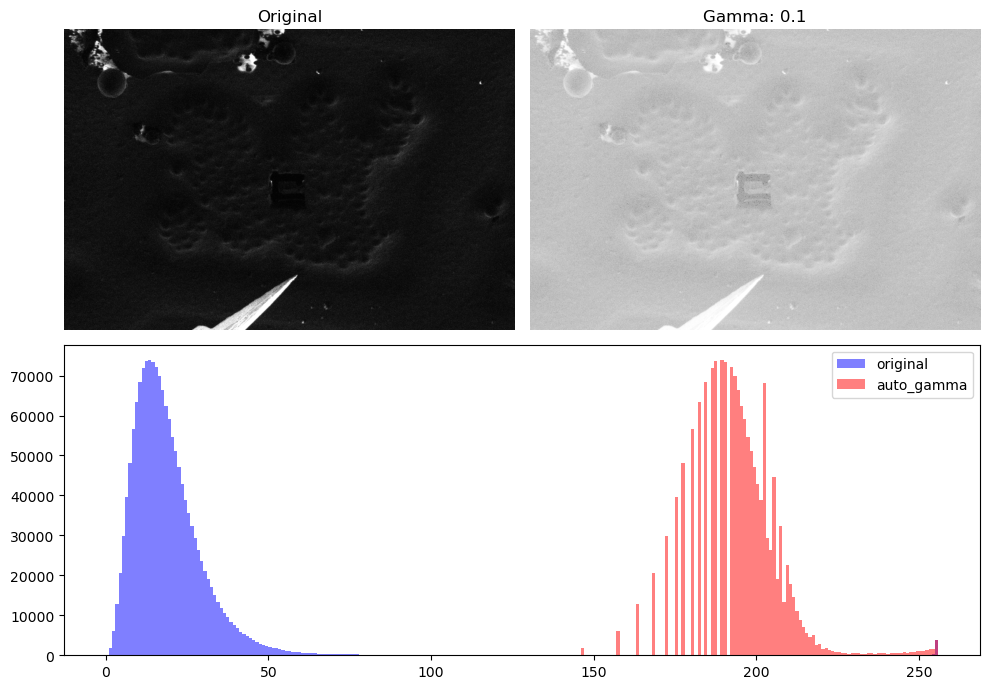

In [4]:
from skimage import exposure
import numpy as np


# arrange values from 0.1 to 3.0 with step 0.1
gamma = np.arange(0.1, 2.5, 0.1)


for gam in gamma:
    image_data = exposure.adjust_gamma(img.data, gam)

    fig = plt.figure(figsize=(10, 7))

    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])

    ax1.set_title(f"Original")
    ax1.imshow(img.data, cmap="gray")
    ax1.axis("off")

    ax2.set_title(f"Gamma: {gam:.1f}")
    ax2.imshow(image_data, cmap="gray")
    ax2.axis("off")

    # [0]plot image histogram
    ax3.hist(img.data.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.5, label="original")
    ax3.legend(loc="upper right")
    ax3.hist(image_data.ravel(), bins=256, range=(0, 256), color="r", alpha=0.5, label="auto_gamma")
    ax3.legend(loc="upper right")

    plt.tight_layout()
    import os
    os.makedirs("gamma", exist_ok=True)
    plt.savefig(f"gamma/gamma_{gam:.1f}.png", dpi=100)

    plt.show()

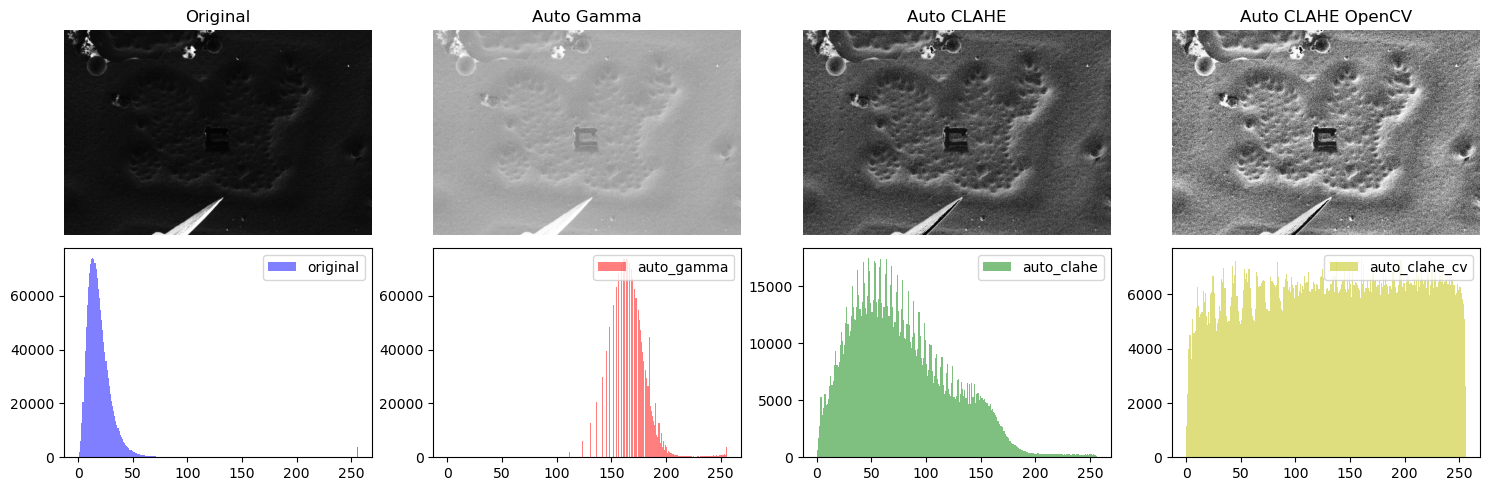

In [7]:
img_autogamma = acquire.auto_gamma(img)
img_autoclahe = acquire.apply_clahe(img)
img_autoclahe_cv = acquire.apply_clahe(img, which_package="OpenCV")


# plot all three image with titles with axis off
fig, ax = plt.subplots(2, 4, figsize=(15, 5))

ax1, ax2, ax3, ax4 = ax[0]
ax5 = ax[1]

ax1.imshow(img.data, cmap="gray")
ax1.set_title("Original")
ax1.axis("off")
ax2.imshow(img_autogamma.data, cmap="gray")
ax2.set_title("Auto Gamma")
ax2.axis("off")
ax3.imshow(img_autoclahe.data, cmap="gray")
ax3.set_title("Auto CLAHE")
ax3.axis("off")
ax4.imshow(img_autoclahe_cv.data, cmap="gray")
ax4.set_title("Auto CLAHE OpenCV")
ax4.axis("off")

# plot image histograms
ax5[0].hist(img.data.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.5, label="original")
ax5[1].hist(img_autogamma.data.ravel(), bins=256, range=(0, 256), color="r", alpha=0.5, label="auto_gamma")
ax5[2].hist(img_autoclahe.data.ravel(), bins=256, range=(0, 256), color="g", alpha=0.5, label="auto_clahe")
ax5[3].hist(img_autoclahe_cv.data.ravel(), bins=256, range=(0, 256), color="y", alpha=0.5, label="auto_clahe_cv")

ax5[0].legend(loc="upper right")
ax5[1].legend(loc="upper right")
ax5[2].legend(loc="upper right")
ax5[3].legend(loc="upper right")

plt.tight_layout()
# reduce space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.05)

plt.savefig("gamma_comparison.png", dpi=300)

plt.show()

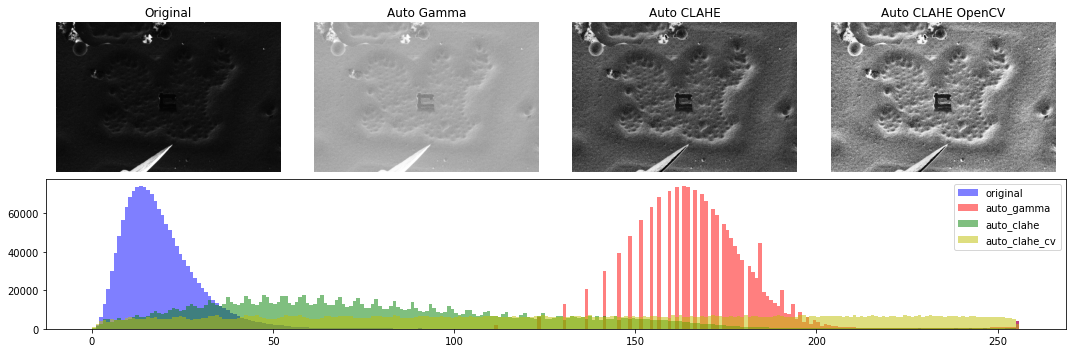

In [21]:
img_autogamma = acquire.auto_gamma(img)
img_autoclahe = acquire.apply_clahe(img)
img_autoclahe_cv = acquire.apply_clahe(img, which_package="OpenCV")


# plot all three image with titles with axis off

fig = plt.figure(figsize=(15, 5))

gs = fig.add_gridspec(2,4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, :])
ax1.imshow(img.data, cmap="gray")
ax1.set_title("Original")
ax1.axis("off")
ax2.imshow(img_autogamma.data, cmap="gray")
ax2.set_title("Auto Gamma")
ax2.axis("off")
ax3.imshow(img_autoclahe.data, cmap="gray")
ax3.set_title("Auto CLAHE")
ax3.axis("off")
ax4.imshow(img_autoclahe_cv.data, cmap="gray")
ax4.set_title("Auto CLAHE OpenCV")
ax4.axis("off")

# plot image histograms
ax5.hist(img.data.ravel(), bins=256, range=(0, 256), color="blue", alpha=0.5, label="original")
ax5.hist(img_autogamma.data.ravel(), bins=256, range=(0, 256), color="r", alpha=0.5, label="auto_gamma")
ax5.hist(img_autoclahe.data.ravel(), bins=256, range=(0, 256), color="g", alpha=0.5, label="auto_clahe")
ax5.hist(img_autoclahe_cv.data.ravel(), bins=256, range=(0, 256), color="y", alpha=0.5, label="auto_clahe_cv")
ax5.legend(loc="upper right")
ax5.legend(loc="upper right")
ax5.legend(loc="upper right")
ax5.legend(loc="upper right")

plt.tight_layout()
# reduce space between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("gamma_comparison.png", dpi=300)

plt.show()